<a href="https://colab.research.google.com/github/siona-pathak/DS2002-HW/blob/main/Pathak_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install matplotlib==3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.1/37.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
^C


In [32]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
#plt.style.use('seaborn-whitegrid')

import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
movie_info = '/content/drive/MyDrive/Top_Highest_Openings.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(movie_info)

# Display the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Release      1000 non-null   object 
 1   Opening      1000 non-null   int64  
 2   Total Gross  1000 non-null   int64  
 3   % of Total   1000 non-null   float64
 4   Theaters     1000 non-null   int64  
 5   Average      1000 non-null   int64  
 6   Date         1000 non-null   object 
 7   Distributor  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.6+ KB
None


In [42]:
df['date'] = pd.to_datetime(df['Date'])
sorted_df = df.sort_values(by='date')
sorted_df['year'] = sorted_df['date'].dt.strftime('%Y')

<ipython-input-42-b6f337423762>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['Date'])


[252583617, 179870271, 0, 0, 153665036, 0, 679305470, 475940428, 483839679, 563671531, 699292074, 907382581, 1014202829, 1548179945, 2462980981, 2002119293, 2752066952, 3299108432, 3912929746, 4353143034, 4942479483, 5570470815, 4636663242, 4743515438, 5963849004, 5721862324, 7518840590, 6771862303, 5956936225, 7255214639, 7261775362, 6921105282, 7800006161, 7943559487, 7619291857, 8153566181, 8074940014, 710792948, 3395140155, 5597060020, 6385508346, 815827855]
0 8153566181


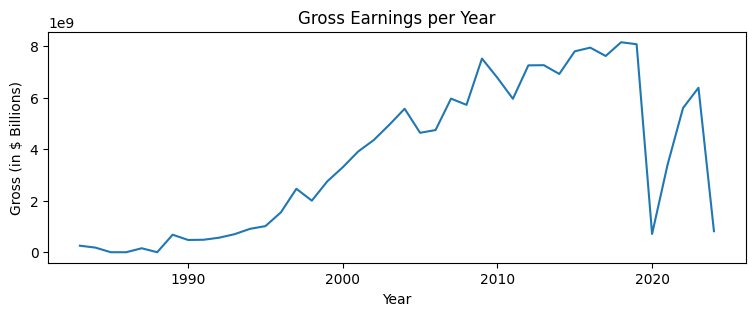

In [40]:

#sorted_df['year'] = sorted_df['date'].dt.strftime('%Y')
#year_l = list(sorted_df['year'].unique())
#print(year_l)
total_s = sorted_df.resample('Y', on='date')['Total Gross'].sum()
year_l = list(total_s.index.year)
total_l = list(total_s.values)
print(total_l)
#print(min(total_l), max(total_l))

fig, ax = plt.subplots(figsize=(9, 3))
plt.plot(year_l, total_l, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Gross (in $ Billions)')
plt.title('Gross Earnings per Year')
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000000) + 'B'))
# Display the plot
plt.show()

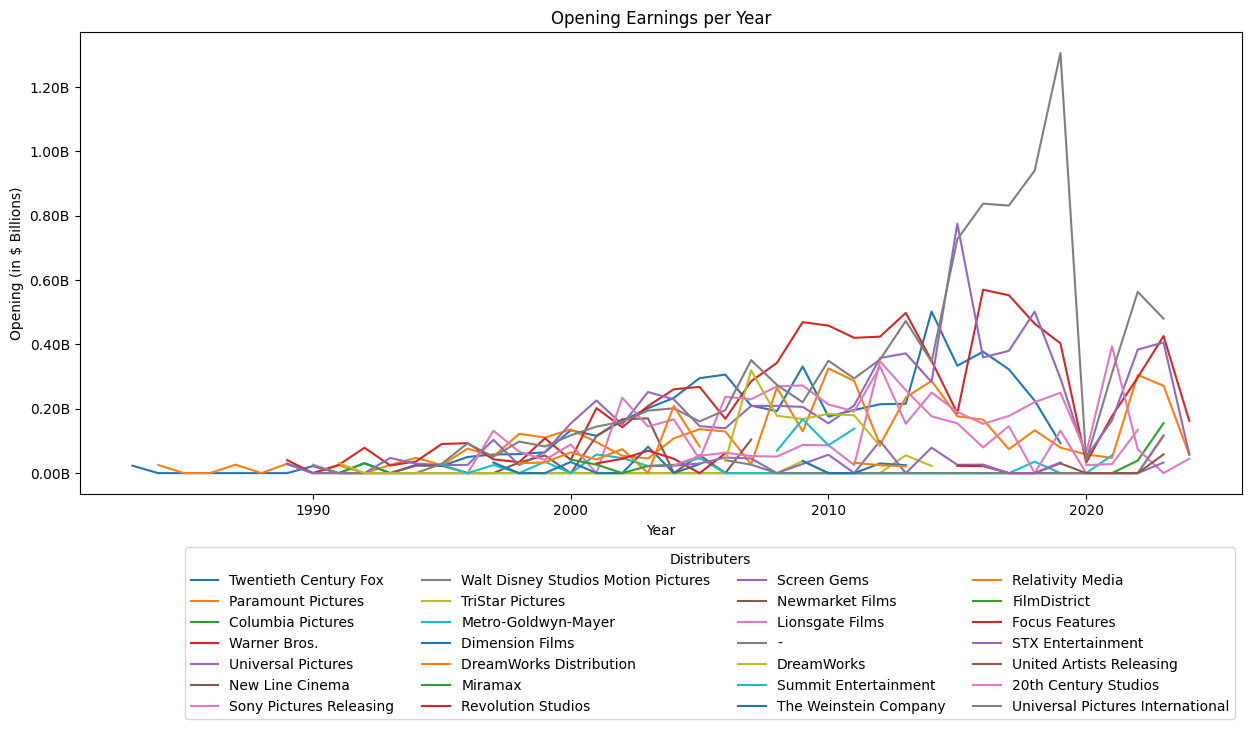

In [105]:
distrib_l = sorted_df['Distributor'].unique()
#print(distrib_l)
fig, ax = plt.subplots(figsize=(15, 6))
for d in distrib_l:
  opening_s = sorted_df[(sorted_df['Distributor'] == d)].resample('Y', on='date')['Opening'].sum()
  year_l = list(opening_s.index.year)
  opening_l = list(opening_s.values)

  plt.plot(year_l, opening_l, linestyle='-')

plt.xlabel('Year')
plt.ylabel('Opening (in $ Billions)')
plt.title('Opening Earnings per Year')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000000) + 'B'))
ax.legend(distrib_l, bbox_to_anchor=(1, -0.1), ncol=4, title="Distributers", loc="upper right")
# Display the plot
plt.show()


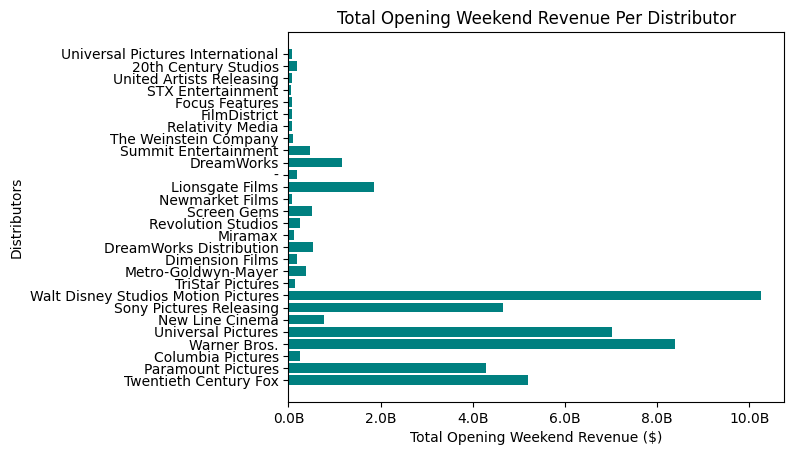

In [83]:
distrib_l = sorted_df['Distributor']
#print(distrib_l)
fig = plt.figure()
ax = plt.axes()

opening_l = []
for d in distrib_l:
  opening = sorted_df[(sorted_df['Distributor'] == d)]['Opening'].sum()
  #print(type(opening_s))
  opening_l.append(opening)

#print(opening_l)
ax.barh(distrib_l,opening_l, color='teal');
ax.set_xlabel('Total Opening Weekend Revenue ($)')
ax.set_ylabel('Distributors')
ax.set_title('Total Opening Weekend Revenue Per Distributor');

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(x/1000000000) + 'B'))
# Display the plot
plt.show()

(array([ 18., 116., 137., 139., 100.,  94.,  67.,  67.,  41.,  34.,  31.,
         18.,  22.,   8.,  16.,  13.,  15.,   7.,  10.,   6.,   8.,   6.,
          3.,   2.,   1.,   1.,   2.,   2.,   1.,   1.,   0.,   2.,   2.,
          1.,   1.,   1.,   2.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([3.38896840e+07, 5.19451348e+07, 7.00005856e+07, 8.80560365e+07,
        1.06111487e+08, 1.24166938e+08, 1.42222389e+08, 1.60277840e+08,
        1.78333291e+08, 1.96388741e+08, 2.14444192e+08, 2.32499643e+08,
        2.50555094e+08, 2.68610545e+08, 2.86665995e+08, 3.04721446e+08,
        3.22776897e+08, 3.40832348e+08, 3.58887799e+08, 3.76943250e+08,
        3.94998700e+08, 4.13054151e+08, 4.31109602e+08, 4.49165053e+08,
        4.67220504e+08, 4.85275954e+08, 5.03331405e+08, 5.21386856e+08,
        5.39442307e+08, 5.57497758e+08, 5.75553209e+08, 5.93608659e+08,
        6.11664110e+08, 6.29719561e+08, 6.47775012e+08, 6.65830463e+08,
        6.

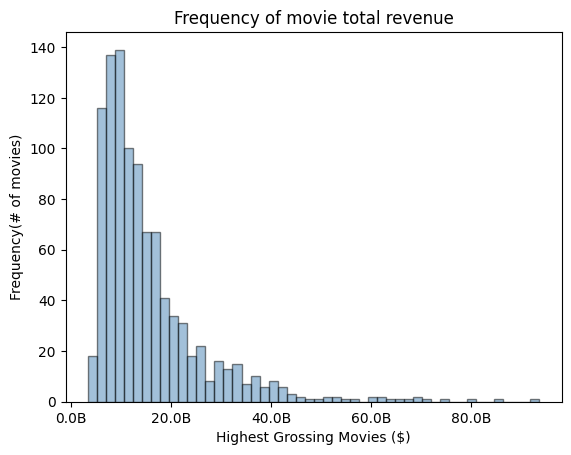

In [106]:
fig = plt.figure()
ax = plt.axes()

ax.set_xlabel('Highest Grossing Movies ($)')
ax.set_ylabel('Frequency(# of movies)')
ax.set_title('Frequency of movie total revenue');

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,}'.format(x/10000000) + 'B'))
plt.hist(sorted_df['Total Gross'], bins=50,
         alpha=0.5,
         histtype='bar',
         color='steelblue',
         edgecolor='black')

